In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from scipy.optimize import curve_fit

Define offset

In [2]:
test_offset=0.02
samples=900

Generate X and Y

In [3]:
def get_some_lifetime_data(copies, dim):
    Y=10.0*np.sort(np.random.uniform(size=[copies,2]))
    X=np.zeros(shape=[copies,dim])
    for s in range(0,copies):
        tau=(Y[s,0]*Y[s,1])/(Y[s,0]+Y[s,1])
        #tau=Y[s,0]
        X[s,:]=np.random.exponential(scale=tau, size=[1,dim])
    return (X,Y)

Setup tf

In [4]:
def original_network(x):
    xflat=tf.contrib.layers.flatten(x)
    layerA=tf.contrib.layers.fully_connected(xflat,10)
    layerB=tf.contrib.layers.fully_connected(layerA, 5)
    return tf.contrib.layers.fully_connected(layerB,2)

In [5]:
def new_network(x):
    xflat=tf.contrib.layers.flatten(x)
    layerA=tf.contrib.layers.fully_connected(xflat,200)
    layerB=tf.contrib.layers.fully_connected(layerA,50)
    layerC=tf.contrib.layers.fully_connected(layerB,10)
    layerD=tf.contrib.layers.fully_connected(layerC,5)
    return tf.contrib.layers.fully_connected(layerD,2)

Load network, calculate loss

In [6]:
x=tf.placeholder(dtype=tf.float32, shape=[None, samples])
y=tf.placeholder(dtype=tf.float32, shape=[None, 2])

logits=original_network(x)

#Setup loss calculation, start with squared error
#YF=tf.reshape(y, shape=[tf.shape(y)[0], 1])
diff=tf.subtract(logits, y)
LS=tf.multiply(diff,diff)
#Add them together
loss=tf.reduce_mean(LS)
train_op=tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss)


#correct_pred=tf.round(logits)
#accuracy=tf.reduce_mean(tf.abs(tf.subtract(correct_pred, Y)))

Train network

In [8]:
tf.set_random_seed(123456)
sess=tf.Session()

sess.run(tf.global_variables_initializer())

(X,Y)=get_some_lifetime_data(1000,samples)
results=0
for i in range(9000):
    if (i%20==0):
        (X,Y)=get_some_lifetime_data(1000,samples)    
    _,results, LN,losses=sess.run([train_op, logits, LS, loss], feed_dict={x:X, y:Y})
    if (i%1000==0):
        print("Error rate: ", LN.shape)
        print("Real loss: ",losses)
        

Error rate:  (1000, 2)
Real loss:  28.6346
Error rate:  (1000, 2)
Real loss:  4.45127
Error rate:  (1000, 2)
Real loss:  3.74209
Error rate:  (1000, 2)
Real loss:  3.19042
Error rate:  (1000, 2)
Real loss:  2.84433
Error rate:  (1000, 2)
Real loss:  2.62661
Error rate:  (1000, 2)
Real loss:  2.25975
Error rate:  (1000, 2)
Real loss:  2.17803
Error rate:  (1000, 2)
Real loss:  1.90579


[ 1.02716876  7.90272266]
[ 0.88203979  5.26271248]
0.867466680718
0.909017751815
[1.700934537634345, 1.7004552136712783]


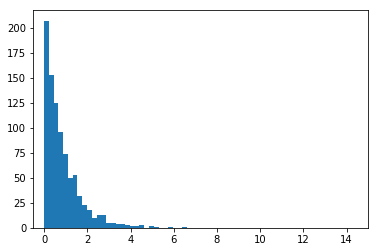

In [35]:
(X,Y)=get_some_lifetime_data(1000,samples)
results, LN,losses=sess.run([logits, LS, loss], feed_dict={x:X, y:Y})

idx=np.random.randint(0,500)
thehist=plt.hist(X[idx,:], bins=30)
plt.xlim(-0.5,15)
print(Y[idx,:])
print(results[idx,:])
print(np.mean(X[idx,:]))
print(Y[idx,0]*Y[idx,1]/(Y[idx,0]+Y[idx,1]))

x_vals=[np.mean([thehist[1][i], thehist[1][i+1]]) for i in range(0,len(thehist[1])-1) ]
y_vals=thehist[0]   
popt, pc=curve_fit(fitme, x_vals, y_vals, bounds=(0.001, [100000,15,15]))
print([popt[1], popt[2]])

In [26]:
def fitme(xx, amplitude, tau1, tau2):
    return amplitude*np.exp(-xx/tau1)*np.exp(-xx/tau2)

In [27]:
x_vals=[np.mean([thehist[1][i], thehist[1][i+1]]) for i in range(0,len(thehist[1])-1) ]
y_vals=thehist[0]    

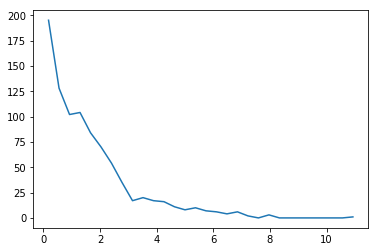

In [28]:
plt.plot(x_vals, y_vals)

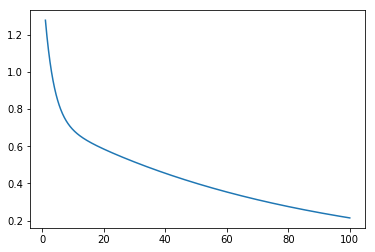

In [47]:
XX=np.linspace(1,100, num=1000)
YY=0.75*np.exp(-XX/3)+0.75*np.exp(-XX/80)
plt.plot(XX,YY)

(array([ 833.,  628.,  491.,  522.,  473.,  446.,  444.,  412.,  374.,
         363.,  338.,  341.,  311.,  323.,  299.,  296.,  299.,  283.,
         249.,  278.,  270.,  199.,  250.,  206.,  191.,  198.,  181.,
         164.,  169.,  169.]),
 array([   1. ,    4.3,    7.6,   10.9,   14.2,   17.5,   20.8,   24.1,
          27.4,   30.7,   34. ,   37.3,   40.6,   43.9,   47.2,   50.5,
          53.8,   57.1,   60.4,   63.7,   67. ,   70.3,   73.6,   76.9,
          80.2,   83.5,   86.8,   90.1,   93.4,   96.7,  100. ]),
 <a list of 30 Patch objects>)

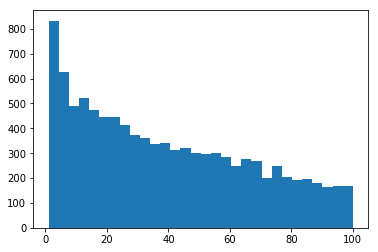

In [52]:
plt.hist(np.random.choice(XX,p=YY/np.sum(YY), size=[10000,1]), bins=30)